### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 5


### Дисциплина: Методы машинного обучения

##### Студент:  Миронов Дмитрий Андреевич
##### Группа:   НПИ-02-21

## Москва 2024
***

### Вариант №11


1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
ds = tfds.load("stl10", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incomplete310T39/stl10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incomplete310T39/stl10-test.tfrecord*...:   0%|          | 0/8…

Generating unlabelled examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incomplete310T39/stl10-unlabelled.tfrecord*...:   0%|         …

Dataset stl10 downloaded and prepared to /root/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


((5000, 2), (8000, 2))

In [2]:
df_train.iloc[0]['image'].shape

(96, 96, 3)

In [3]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((5000,), (8000,))

In [4]:
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
train_images.shape, test_images.shape

((5000, 96, 96, 3), (8000, 96, 96, 3))

In [5]:
from PIL import Image, ImageOps
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_test.iloc[idx]['image']))

train_images.shape, test_images.shape

((5000, 96, 96, 3), (8000, 96, 96, 3))

In [6]:
train_images /= 255
test_images  /= 255

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

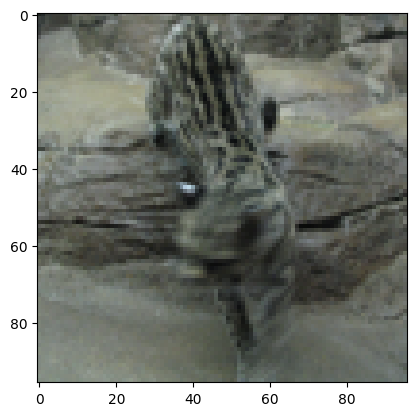

In [8]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()
plt.imshow(test_images[1])

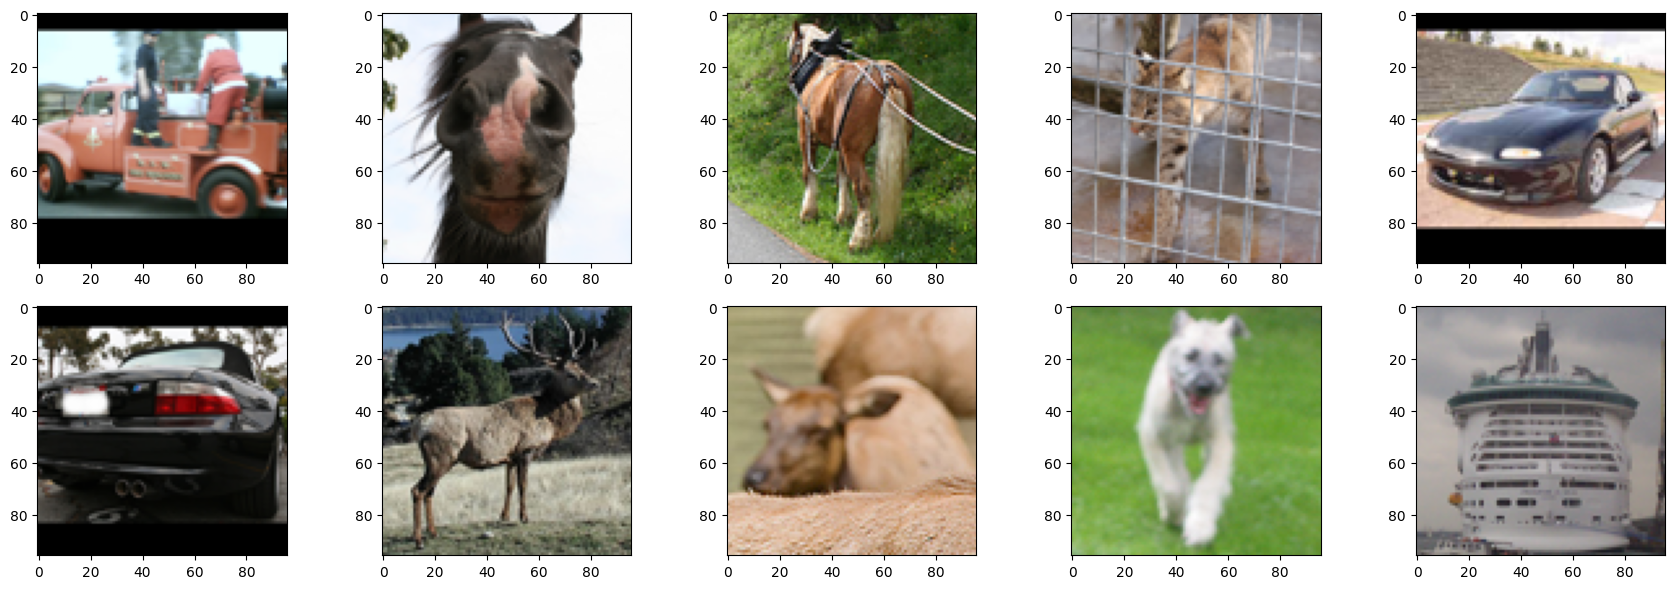

In [9]:
plot_random_sample(test_images)

3. Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании). Отследите обучение нейронных сетей и укажите, на сколько процентов снизились в результате обучения потери по отношению к потерям на первой эпохе обучения. Оцените результаты обучения нейронных сетей (варианты: нейронная сеть обучилась, недообучилась, переобучилась).    

In [30]:
train_images_binary = train_images[np.isin(train_labels, [1, 3])]
test_images_binary = test_images[np.isin(test_labels, [1, 3])]
train_labels_binary = train_labels[np.isin(train_labels, [1, 3])]
test_labels_binary = test_labels[np.isin(test_labels, [1, 3])]

In [31]:
# Фильтрация данных для классов 1 и 3
train_mask = df_train['label'].isin([1, 3])
test_mask = df_test['label'].isin([1, 3])

df_train_filtered = df_train.loc[train_mask]
df_test_filtered = df_test.loc[test_mask]

# Преобразование меток классов в бинарный формат
df_train_filtered.loc[:, 'label'] = df_train_filtered['label'].apply(lambda x: 0 if x == 1 else 1)
df_test_filtered.loc[:, 'label'] = df_test_filtered['label'].apply(lambda x: 0 if x == 1 else 1)

# Конвертация изображений и меток в numpy массивы
train_labels = df_train_filtered['label'].to_numpy(dtype=np.float32)
test_labels = df_test_filtered['label'].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train_filtered.shape[0], 96, 96, 3), dtype=np.float32)
test_images = np.zeros(shape=(df_test_filtered.shape[0], 96, 96, 3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx, :, :, :] = df_train_filtered.iloc[idx]['image']

for idx in range(test_labels.shape[0]):
    test_images[idx, :, :, :] = df_test_filtered.iloc[idx]['image']

# Нормализация изображений
train_images /= 255.0
test_images /= 255.0

In [32]:
def fowlkes_mallows_index(y_true, y_pred):
    y_true = tf.round(y_true)
    y_pred = tf.round(y_pred)

    true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    true_negatives = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
    false_positives = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))

    precision = true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())
    recall = true_positives / (true_positives + true_negatives + tf.keras.backend.epsilon())

    fowlkes_mallows = tf.sqrt(precision * recall)

    return fowlkes_mallows

MLP

In [33]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten()
])

num_hidden_layers = 5
neurons = 50
for i in range(num_hidden_layers):
    if i % 2 != 0:
        model_1.add(tf.keras.layers.Dense(neurons, activation='swish', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    else:
        model_1.add(tf.keras.layers.Dense(neurons, activation='swish'))
    neurons += 10

model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adagrad(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        fowlkes_mallows_index
    ]
)

In [34]:
history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/100
8/8 [==============================] - 4s 263ms/step - loss: 1.9828 - accuracy: 0.5000 - fowlkes_mallows_index: 0.1163 - val_loss: 1.9817 - val_accuracy: 0.4981 - val_fowlkes_mallows_index: 0.0522
Epoch 2/100
8/8 [==============================] - 1s 83ms/step - loss: 1.9811 - accuracy: 0.5030 - fowlkes_mallows_index: 0.0607 - val_loss: 1.9802 - val_accuracy: 0.4969 - val_fowlkes_mallows_index: 0.0232
Epoch 3/100
8/8 [==============================] - 1s 70ms/step - loss: 1.9796 - accuracy: 0.5030 - fowlkes_mallows_index: 0.0727 - val_loss: 1.9786 - val_accuracy: 0.4994 - val_fowlkes_mallows_index: 0.0203
Epoch 4/100
8/8 [==============================] - 0s 31ms/step - loss: 1.9781 - accuracy: 0.5020 - fowlkes_mallows_index: 0.0502 - val_loss: 1.9770 - val_accuracy: 0.4994 - val_fowlkes_mallows_index: 0.0203
Epoch 5/100
8/8 [==============================] - 0s 36ms/step - loss: 1.9765 - accuracy: 0.5030 - fowlkes_mallows_index: 0.0581 - val_loss: 1.9755 - val_accuracy: 0.

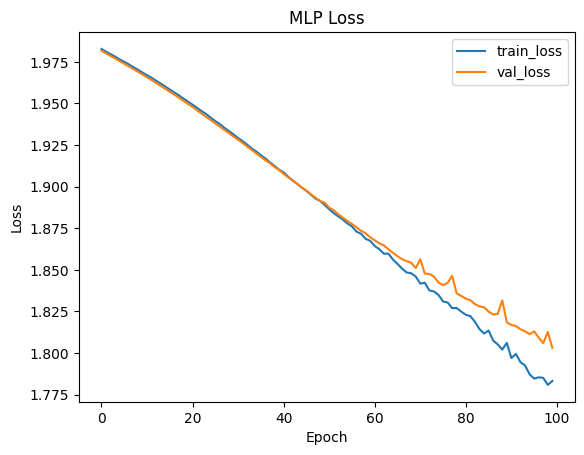

In [35]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_loss(history_1, "MLP Loss")

Оценка обучения модели

In [37]:
def evaluate_training(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    if val_loss[-1] < train_loss[-1]:
        return "Недообучилась"
    elif val_loss[-1] > train_loss[-1] and (val_loss[-1] - train_loss[-1]) / val_loss[-1] > 0.1:
        return "Переобучилась"
    else:
        return "Обучилась"

mlp_status = evaluate_training(history_1)
print(f"MLP Training Status: {mlp_status}")

# Печать метрик качества
final_fowlkes_mallows = history_1.history['val_fowlkes_mallows_index'][-1]
print(f"Final Fowlkes-Mallows Index on Validation Data: {final_fowlkes_mallows:.4f}")

MLP Training Status: Обучилась
Final Fowlkes-Mallows Index on Validation Data: 0.5757


In [38]:
# Расчет процента снижения потерь
initial_loss = history_1.history['loss'][0]
final_loss = history_1.history['loss'][-1]
loss_reduction = (initial_loss - final_loss) / initial_loss * 100
print(f"Loss Reduction: {loss_reduction:.2f}%")

Loss Reduction: 10.07%


CNN

In [51]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu, input_shape=(96, 96, 3)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        fowlkes_mallows_index
    ]
)

In [52]:
history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=25,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/25
8/8 [==============================] - 3s 201ms/step - loss: 0.7883 - accuracy: 0.4700 - fowlkes_mallows_index: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_fowlkes_mallows_index: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 1s 88ms/step - loss: 0.7108 - accuracy: 0.4900 - fowlkes_mallows_index: 0.4513 - val_loss: 0.6931 - val_accuracy: 0.5331 - val_fowlkes_mallows_index: 0.4277
Epoch 3/25
8/8 [==============================] - 1s 88ms/step - loss: 0.7117 - accuracy: 0.4880 - fowlkes_mallows_index: 0.5131 - val_loss: 0.6930 - val_accuracy: 0.4994 - val_fowlkes_mallows_index: 0.0000e+00
Epoch 4/25
8/8 [==============================] - 1s 79ms/step - loss: 0.7016 - accuracy: 0.4940 - fowlkes_mallows_index: 0.4560 - val_loss: 0.6931 - val_accuracy: 0.5031 - val_fowlkes_mallows_index: 0.7007
Epoch 5/25
8/8 [==============================] - 1s 84ms/step - loss: 0.6945 - accuracy: 0.5320 - fowlkes_mallows_index: 0.4768 - val_loss: 0.6932 - val_accuracy:

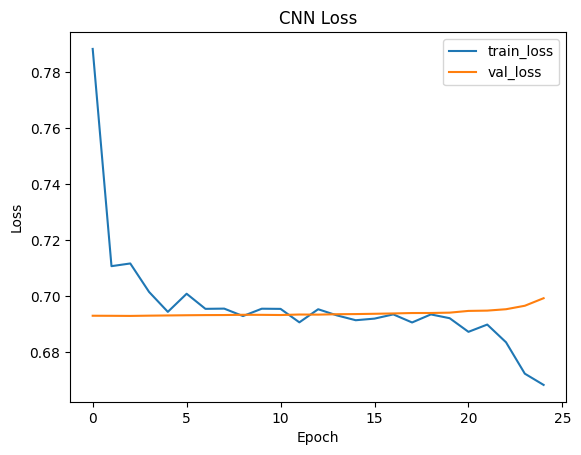

In [53]:
plot_loss(history_2, "CNN Loss")

In [54]:
cnn_status = evaluate_training(history_2)
print(f"CNN Training Status: {cnn_status}")

# Печать метрик качества
final_fowlkes_mallows = history_2.history['val_fowlkes_mallows_index'][-1]
print(f"Final Fowlkes-Mallows Index on Validation Data: {final_fowlkes_mallows:.4f}")

CNN Training Status: Обучилась
Final Fowlkes-Mallows Index on Validation Data: 0.7049


In [55]:
# Расчет процента снижения потерь
initial_loss = history_2.history['loss'][0]
final_loss = history_2.history['loss'][-1]
loss_reduction = (initial_loss - final_loss) / initial_loss * 100
print(f"Loss Reduction: {loss_reduction:.2f}%")

Loss Reduction: 15.21%


4.Постройте кривые обучения нейронных сетей бинарной классификации для показателей потерь и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

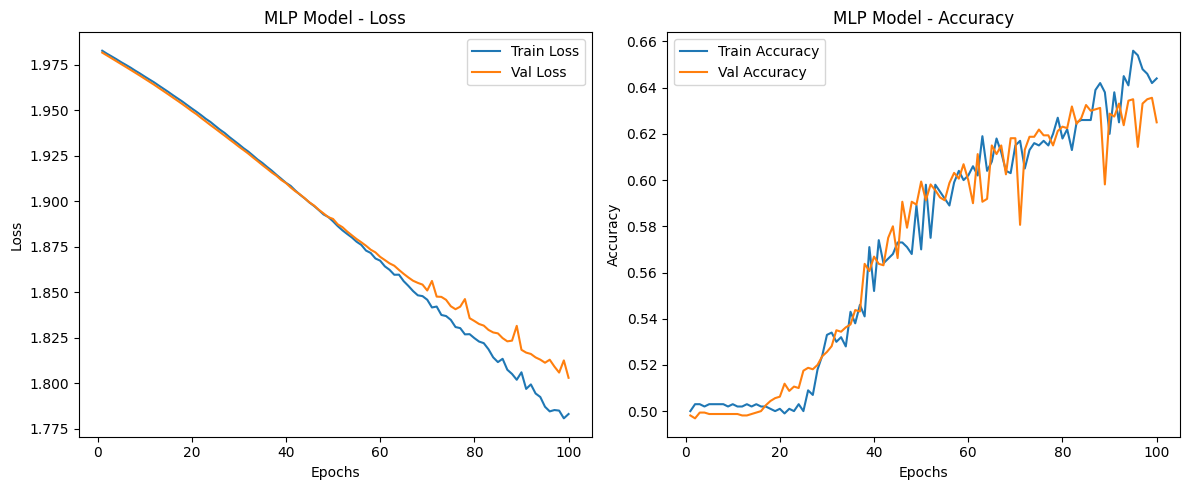

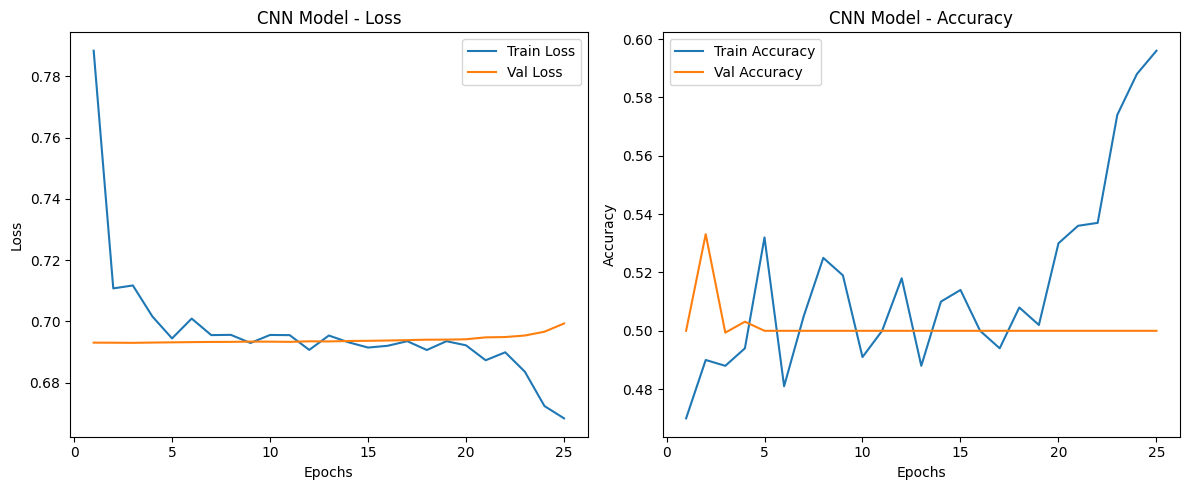

In [56]:
def plot_learning_curves(history, model_name):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history_1, 'MLP Model')
plot_learning_curves(history_2, 'CNN Model')

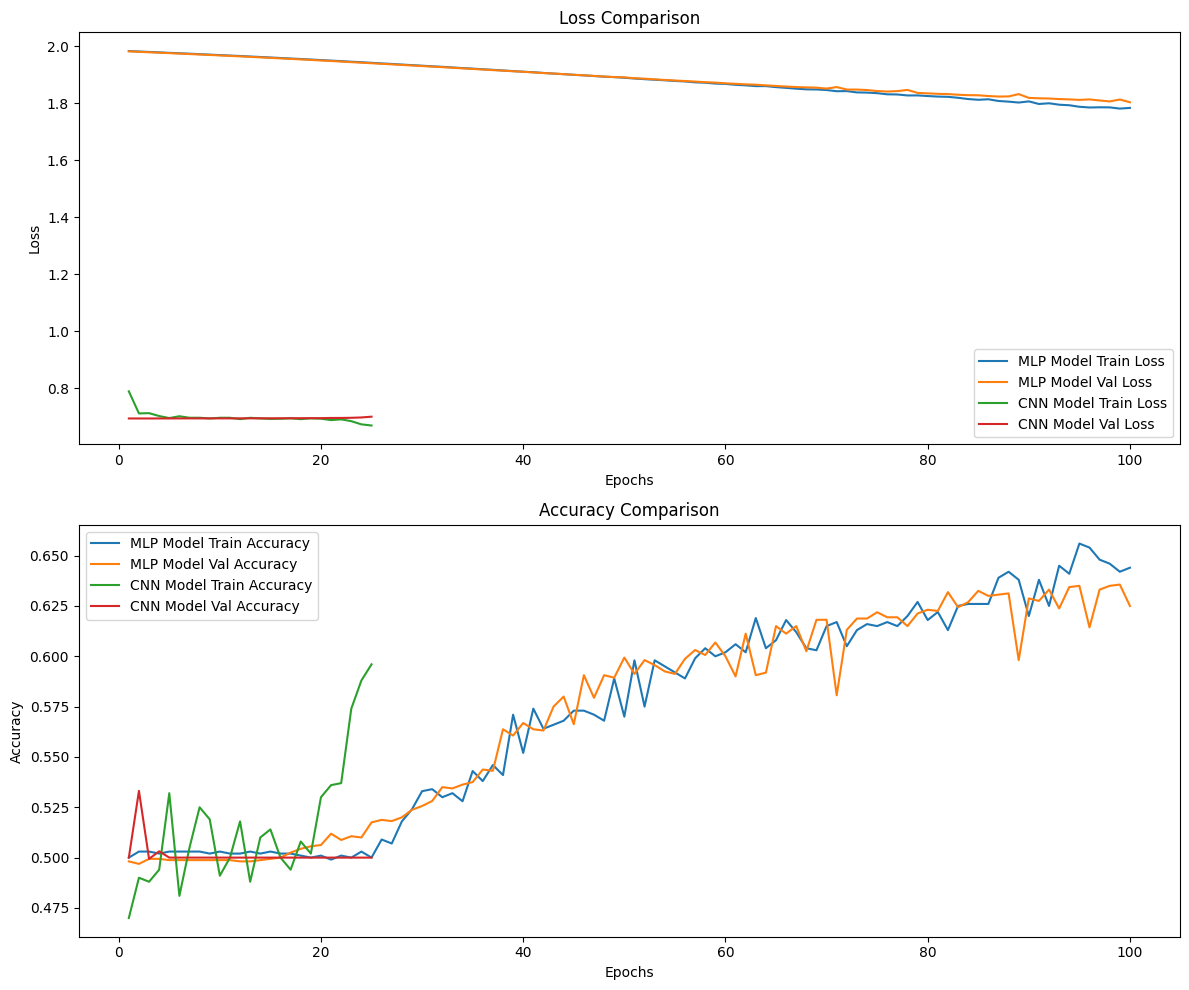

In [57]:
def plot_comparison_learning_curves(history1, history2, model1_name, model2_name):
    epochs1 = range(1, len(history1.history['loss']) + 1)
    epochs2 = range(1, len(history2.history['loss']) + 1)

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs1, history1.history['loss'], label=f'{model1_name} Train Loss')
    plt.plot(epochs1, history1.history['val_loss'], label=f'{model1_name} Val Loss')
    plt.plot(epochs2, history2.history['loss'], label=f'{model2_name} Train Loss')
    plt.plot(epochs2, history2.history['val_loss'], label=f'{model2_name} Val Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs1, history1.history['accuracy'], label=f'{model1_name} Train Accuracy')
    plt.plot(epochs1, history1.history['val_accuracy'], label=f'{model1_name} Val Accuracy')
    plt.plot(epochs2, history2.history['accuracy'], label=f'{model2_name} Train Accuracy')
    plt.plot(epochs2, history2.history['val_accuracy'], label=f'{model2_name} Val Accuracy')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_comparison_learning_curves(history_1, history_2, 'MLP Model', 'CNN Model')


5.Сравните качество бинарной классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

In [58]:
from sklearn.metrics import confusion_matrix

def compute_fowlkes_mallows_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fowlkes_mallows_index = (tp / (tp + tn)) * (tp / (tp + fp))**0.5
    return fowlkes_mallows_index

In [61]:
# Предсказание меток на тестовом наборе
mlp_predictions = (model_1.predict(test_images) > 0.5).astype("int32")
cnn_predictions = (model_2.predict(test_images) > 0.5).astype("int32")
# Расчет Фоулкса – Мэллоуса
mlp_fowlkes_mallows = compute_fowlkes_mallows_score(test_labels, mlp_predictions)
cnn_fowlkes_mallows = compute_fowlkes_mallows_score(test_labels, cnn_predictions)

print(f'MLP Model Fowlkes-Mallows Index: {mlp_fowlkes_mallows:.4f}')
print(f'CNN Model Fowlkes-Mallows Index: {cnn_fowlkes_mallows:.4f}')

50/50 [==============================] - 0s 6ms/step
MLP Model Fowlkes-Mallows Index: 0.4286
CNN Model Fowlkes-Mallows Index: 0.7071


6.Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

In [62]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
    return roc.reshape(-1, 2)

In [63]:
def true_false_positive(predictions, y_true):
    TP = np.sum((predictions == 1) & (y_true == 1))
    FP = np.sum((predictions == 1) & (y_true == 0))
    TN = np.sum((predictions == 0) & (y_true == 0))
    FN = np.sum((predictions == 0) & (y_true == 1))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    return TPR, FPR

50/50 [==============================] - 0s 5ms/step


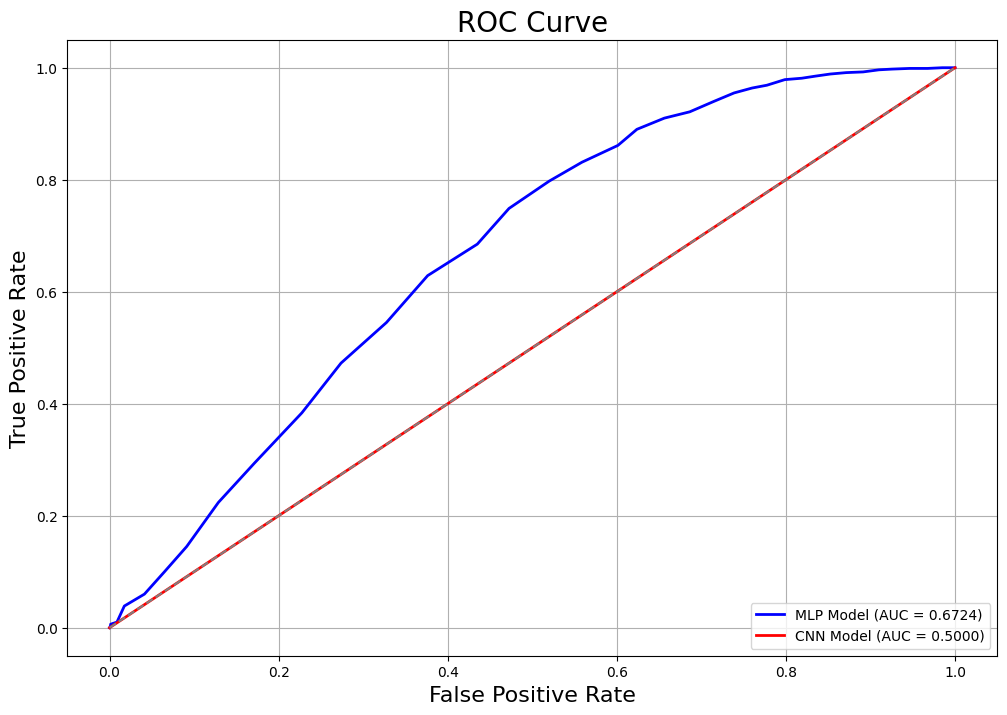

MLP Model AUC: 0.6724
CNN Model AUC: 0.5000


In [64]:
from sklearn.metrics import roc_curve, auc

# Предсказание вероятностей на тестовом наборе
mlp_probabilities = model_1.predict(test_images).reshape(-1)
cnn_probabilities = model_2.predict(test_images).reshape(-1)

roc_mlp = roc_from_scratch(mlp_probabilities, test_labels, partitions=50)
roc_cnn = roc_from_scratch(cnn_probabilities, test_labels, partitions=50)

auc_mlp = auc(roc_mlp[:, 0], roc_mlp[:, 1])
auc_cnn = auc(roc_cnn[:, 0], roc_cnn[:, 1])

plt.figure(figsize=(12, 8))
plt.plot(roc_mlp[:, 0], roc_mlp[:, 1], color='blue', lw=2, label=f'MLP Model (AUC = {auc_mlp:.4f})')
plt.plot(roc_cnn[:, 0], roc_cnn[:, 1], color='red', lw=2, label=f'CNN Model (AUC = {auc_cnn:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Настройка графика
plt.title('ROC Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'MLP Model AUC: {auc_mlp:.4f}')
print(f'CNN Model AUC: {auc_cnn:.4f}')

7.Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании).

In [89]:
from tensorflow.keras.utils import to_categorical

# Фильтрация данных для классов 1, 2, 3
train_mask = df_train['label'].isin([1, 2, 3])
test_mask = df_test['label'].isin([1, 2, 3])

df_train_filtered = df_train.loc[train_mask]
df_test_filtered = df_test.loc[test_mask]

# Преобразование меток классов: 1 -> 0, 2 -> 1, 3 -> 2
label_map = {1: 0, 2: 1, 3: 2}
df_train_filtered['label'] = df_train_filtered['label'].map(label_map)
df_test_filtered['label'] = df_test_filtered['label'].map(label_map)

# Преобразование меток классов в one-hot формат
train_labels = to_categorical(df_train_filtered['label'], num_classes=3)
test_labels = to_categorical(df_test_filtered['label'], num_classes=3)

# Конвертация изображений и меток в numpy массивы
train_images = np.zeros(shape=(df_train_filtered.shape[0], 96, 96, 3), dtype=np.float32)
test_images = np.zeros(shape=(df_test_filtered.shape[0], 96, 96, 3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx, :, :, :] = df_train_filtered.iloc[idx]['image']

for idx in range(test_labels.shape[0]):
    test_images[idx, :, :, :] = df_test_filtered.iloc[idx]['image']

# Нормализация изображений
train_images /= 255.0
test_images /= 255.0

<ipython-input-89-4db9a1aa17e2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['label'] = df_train_filtered['label'].map(label_map)
<ipython-input-89-4db9a1aa17e2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_filtered['label'] = df_test_filtered['label'].map(label_map)


In [90]:
tf.random.set_seed(42)

model_mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='swish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(60, activation='swish'),
    tf.keras.layers.Dense(70, activation='swish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80, activation='swish'),
    tf.keras.layers.Dense(90, activation='swish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_mlp.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adagrad(),
    metrics=['accuracy']
)

In [91]:
history_mlp = model_mlp.fit(
    train_images,
    train_labels,
    epochs=125,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/125
12/12 [==============================] - 3s 119ms/step - loss: 3.5882 - accuracy: 0.3447 - val_loss: 3.5843 - val_accuracy: 0.3383
Epoch 2/125
12/12 [==============================] - 0s 41ms/step - loss: 3.5817 - accuracy: 0.3480 - val_loss: 3.5773 - val_accuracy: 0.3367
Epoch 3/125
12/12 [==============================] - 0s 32ms/step - loss: 3.5702 - accuracy: 0.3713 - val_loss: 3.5679 - val_accuracy: 0.3350
Epoch 4/125
12/12 [==============================] - 1s 55ms/step - loss: 3.5621 - accuracy: 0.3673 - val_loss: 3.5612 - val_accuracy: 0.3367
Epoch 5/125
12/12 [==============================] - 1s 49ms/step - loss: 3.5559 - accuracy: 0.3600 - val_loss: 3.5527 - val_accuracy: 0.3450
Epoch 6/125
12/12 [==============================] - 0s 35ms/step - loss: 3.5515 - accuracy: 0.3427 - val_loss: 3.5455 - val_accuracy: 0.3558
Epoch 7/125
12/12 [==============================] - 0s 29ms/step - loss: 3.5446 - accuracy: 0.3820 - val_loss: 3.5381 - val_accuracy: 0.3558
Epoch

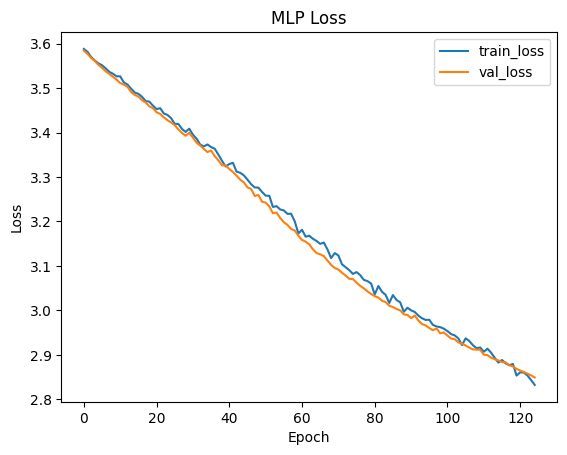

In [92]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_loss(history_mlp, "MLP Loss")

In [93]:
# Расчет процента снижения потерь
initial_loss = history_mlp.history['loss'][0]
final_loss = history_mlp.history['loss'][-1]
loss_reduction = (initial_loss - final_loss) / initial_loss * 100
print(f"Loss Reduction: {loss_reduction:.2f}%")

Loss Reduction: 21.07%


In [94]:
mlp_status = evaluate_training(history_mlp)
print(f"MLP Training Status: {mlp_status}")

MLP Training Status: Обучилась


CNN

In [110]:
tf.random.set_seed(42)

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu, input_shape=(96, 96, 3)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_cnn.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)


In [111]:
history_cnn = model_cnn.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/50
12/12 [==============================] - 4s 149ms/step - loss: 1.2312 - accuracy: 0.3253 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 1s 71ms/step - loss: 1.1132 - accuracy: 0.3447 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 1s 70ms/step - loss: 1.1026 - accuracy: 0.3333 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 1s 67ms/step - loss: 1.0979 - accuracy: 0.3560 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 5/50
12/12 [==============================] - 1s 70ms/step - loss: 1.0977 - accuracy: 0.3540 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 6/50
12/12 [==============================] - 1s 70ms/step - loss: 1.0934 - accuracy: 0.3667 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 7/50
12/12 [==============================] - 1s 69ms/step - loss: 1.0882 - accuracy: 0.3900 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 8/50
1

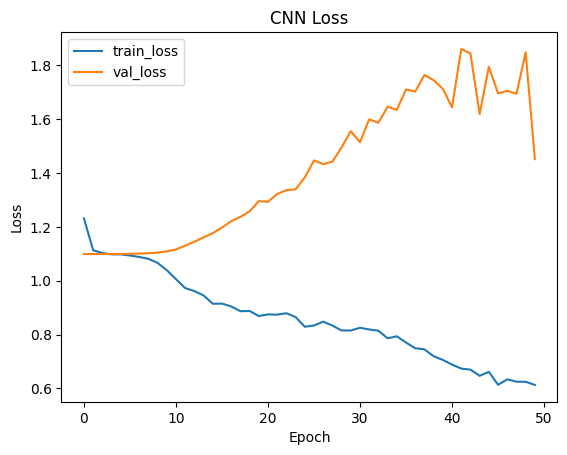

In [112]:
plot_loss(history_cnn, "CNN Loss")

In [113]:
# Расчет процента снижения потерь
initial_loss = history_cnn.history['loss'][0]
final_loss = history_cnn.history['loss'][-1]
loss_reduction = (initial_loss - final_loss) / initial_loss * 100
print(f"Loss Reduction: {loss_reduction:.2f}%")

Loss Reduction: 50.24%


In [114]:
cnn_status = evaluate_training(history_cnn)
print(f"CNN Training Status: {cnn_status}")

CNN Training Status: Переобучилась


8. Сравните качество многоклассовой классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

In [119]:
from sklearn.metrics import classification_report

mlp_predictions = np.argmax(model_mlp.predict(test_images), axis=1)
cnn_predictions = np.argmax(model_cnn.predict(test_images), axis=1)

# Преобразование one-hot меток обратно в метки классов
test_labels_classes = np.argmax(test_labels, axis=1)

print("MLP Model Classification Report:")
print(classification_report(test_labels_classes, mlp_predictions))

print("CNN Model Classification Report:")
print(classification_report(test_labels_classes, cnn_predictions))


75/75 [==============================] - 0s 4ms/step
MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.34      0.47       800
           1       0.87      0.75      0.81       800
           2       0.50      0.83      0.62       800

    accuracy                           0.64      2400
   macro avg       0.70      0.64      0.63      2400
weighted avg       0.70      0.64      0.63      2400

CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       800
           1       0.98      0.14      0.24       800
           2       0.35      1.00      0.52       800

    accuracy                           0.38      2400
   macro avg       0.44      0.38      0.25      2400
weighted avg       0.44      0.38      0.25      2400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9.Постройте кривые обучения нейронных сетей многоклассовой классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.Сопроводите программный код необходимыми комментариями.

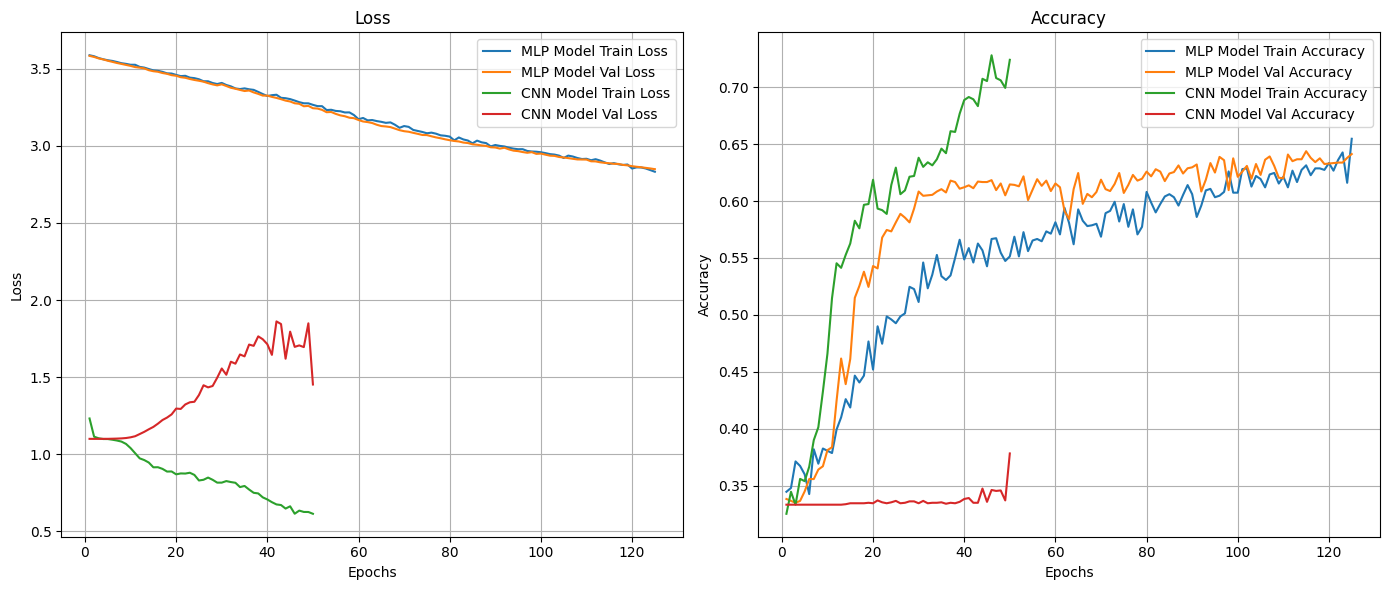

In [120]:
def plot_learning_curves(history_mlp, history_cnn, model_names):
    epochs_mlp = range(1, len(history_mlp.history['loss']) + 1)
    epochs_cnn = range(1, len(history_cnn.history['loss']) + 1)

    plt.figure(figsize=(14, 6))

    # График ошибки
    plt.subplot(1, 2, 1)
    plt.plot(epochs_mlp, history_mlp.history['loss'], label=f'{model_names[0]} Train Loss')
    plt.plot(epochs_mlp, history_mlp.history['val_loss'], label=f'{model_names[0]} Val Loss')
    plt.plot(epochs_cnn, history_cnn.history['loss'], label=f'{model_names[1]} Train Loss')
    plt.plot(epochs_cnn, history_cnn.history['val_loss'], label=f'{model_names[1]} Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(epochs_mlp, history_mlp.history['accuracy'], label=f'{model_names[0]} Train Accuracy')
    plt.plot(epochs_mlp, history_mlp.history['val_accuracy'], label=f'{model_names[0]} Val Accuracy')
    plt.plot(epochs_cnn, history_cnn.history['accuracy'], label=f'{model_names[1]} Train Accuracy')
    plt.plot(epochs_cnn, history_cnn.history['val_accuracy'], label=f'{model_names[1]} Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Вызов функции для построения кривых обучения
plot_learning_curves(history_mlp, history_cnn, model_names=['MLP Model', 'CNN Model'])
